У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../2. Data/yulu_rental.csv')
df_1 = df.sort_values(by='registered', ascending=False)
df_1.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.060,44,16.9979,91,886,977
9752,2012-10-10 17:00:00,4,0,1,1,23.78,27.275,43,15.0013,91,857,948
9297,2012-09-10 18:00:00,3,0,1,1,25.42,31.060,35,19.9995,111,857,968
9896,2012-10-16 17:00:00,4,0,1,1,21.32,25.000,39,12.9980,104,839,943
9584,2012-10-03 17:00:00,4,0,1,1,28.70,32.575,65,0.0000,84,833,917


In [52]:
df_2 = df_1.groupby('registered').size().reset_index(name='кількість')
df_2 = df_2.sort_values(by='registered', ascending=True)
df_2[:20]


,registered,кількість
0,0,15
1,1,135
2,2,150
3,3,195
4,4,190
5,5,177
6,6,155
7,7,126
8,8,114
9,9,114


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

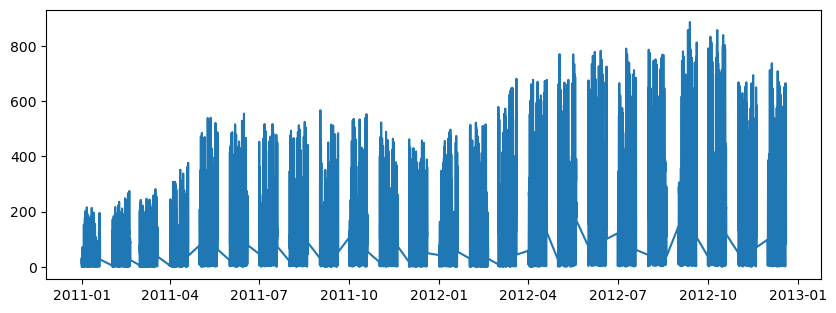

In [19]:
df['datetime'] = pd.to_datetime(df.datetime)
plt.figure(figsize=(10, 3.5))
plt.plot(df.datetime, df.registered);

In [ ]:
df.dtypes

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

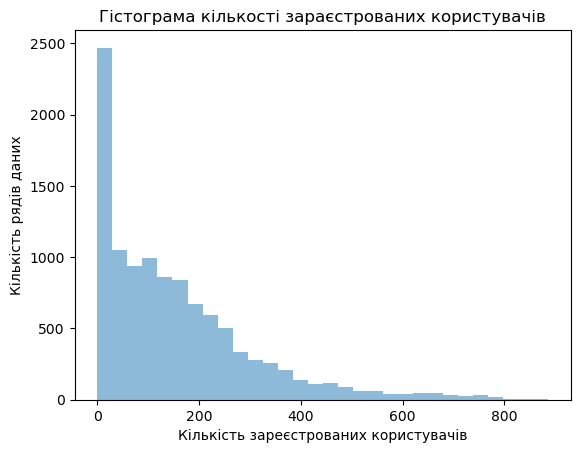

In [29]:
plt.hist(df.registered, bins=30, alpha=0.5)
plt.title('Гістограма кількості зараєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів')
plt.ylabel('Кількість рядів даних')
plt.show;

1. Найбільше даних(зліва перший бін) де незначна кількість реєстрацій за годину, це години, в які немає попиту на велосипеди (нічні години, години, коли всі на роботі
2. далі біни з 2 по 8 там, мабуть, зосереджені реєстрації в години ділової активності в будні дні, коли ми маємо стабільно високий попит
3. всі інші біни де найвищі показники реєстрації за годину - це, скоріш за все пікові години, коли усі одночасно або їдуть на роботу, або з роботи, а коли цьому сприяє ще й погода, то реєстрації зашкалюють.

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [53]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [54]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [55]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [98]:
df_for_hist = df[['dayofweek']][df.registered==0].groupby('dayofweek').size().reset_index(name="count_0")
df_for_hist

,dayofweek,count_0
0,0,5
1,1,3
2,2,2
3,3,1
4,4,1
5,5,1
6,6,2


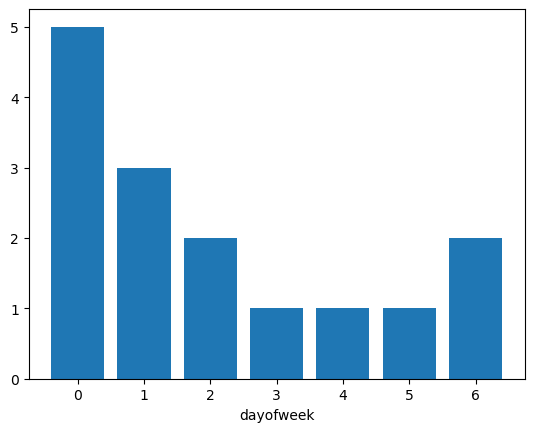

In [99]:
plt.bar(df_for_hist.dayofweek, df_for_hist.count_0)
plt.xlabel('dayofweek')
plt.show;

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [117]:
df_group_weather = df.groupby('weather').sum().reset_index()
df_group_weather
# df_group_weather.columns

,weather,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek
0,1,17959,204,4839,147846.82,172565.755,407907,92723.1626,289900,1186163,1476063,22176
1,2,7171,92,1937,55587.80,65387.220,195831,34517.8506,87246,419914,507160,8199
2,3,2156,15,635,16790.32,19544.905,69872,12087.2020,14983,87106,102089,2435
3,4,1,0,1,8.20,11.365,86,6.0032,6,158,164,0


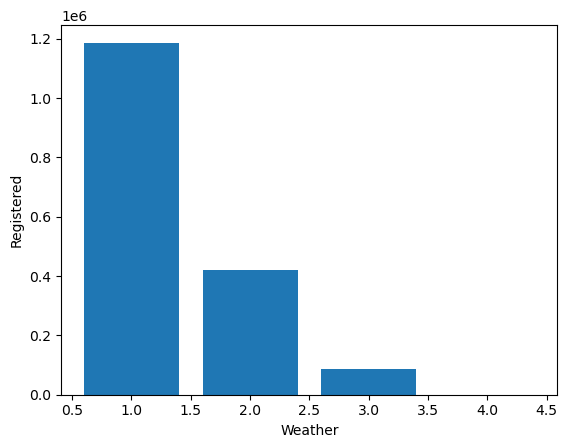

In [116]:
plt.bar(df_group_weather.weather, df_group_weather.registered)
plt.xlabel('Weather') 
plt.ylabel('Registered')
plt.show;

Побудована діаграма погано читаєма, підписи стовбчиків повинні бути ʼрядковимиʼ  
Дані, що відповідають 4 індексу взагалі невидно, хоча вони там є.  
Незрозумілий масштаб (мабуть тут краще було дані нормалізувати, і все відобразити долями)

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

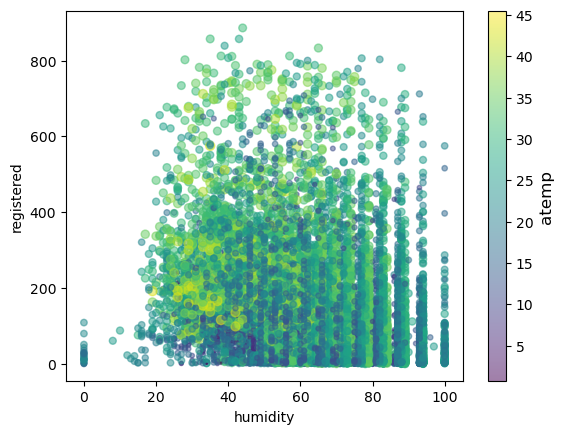

In [139]:
plt.scatter(df.humidity, df.registered, alpha=0.5, s=df.atemp, c=df.atemp)
plt.xlabel('humidity')
plt.ylabel('registered')
plt.colorbar().set_label('atemp', fontsize=12)
plt.show;

На графіку ми бачимо відсутність залежності кількості реєстрацій від вологості повітря  
Деяка кількість реєстрацій при 0 вологості, скоріш за все, якась помилка в даних

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)